In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [1]:
!mkdir liverdataset
!unzip /content/drive/MyDrive/liverdataset/img.zip -d /content/liverdataset
!unzip /content/drive/MyDrive/liverdataset/masks.zip -d /content/liverdataset

Archive:  /content/drive/MyDrive/liverdataset/img.zip
   creating: /content/liverdataset/img/
  inflating: /content/liverdataset/img/testraw100.jpg  
  inflating: /content/liverdataset/img/testraw100_Bg7A1Gykul.jpg  
  inflating: /content/liverdataset/img/testraw100_H2H0h7CSPF.jpg  
  inflating: /content/liverdataset/img/testraw100_J812cIxvRk.jpg  
  inflating: /content/liverdataset/img/testraw100_bK7cTM8Gzo.jpg  
  inflating: /content/liverdataset/img/testraw100_dUjdcOIvH5.jpg  
  inflating: /content/liverdataset/img/testraw100_gsq2XqkYrM.jpg  
  inflating: /content/liverdataset/img/testraw100_hRpbFuLkwa.jpg  
  inflating: /content/liverdataset/img/testraw100_iG9MvfUoeD.jpg  
  inflating: /content/liverdataset/img/testraw100_inW9Hb8wiM.jpg  
  inflating: /content/liverdataset/img/testraw100_mcDhQRREUa.jpg  
  inflating: /content/liverdataset/img/testraw100_o8SDvZI86A.jpg  
  inflating: /content/liverdataset/img/testraw125.jpg  
  inflating: /content/liverdataset/img/testraw125_7INLNDW

In [2]:
import glob 
import os
masks_filepath = sorted(os.listdir('/content/liverdataset/masks'))
print(masks_filepath)
images_filepath = sorted(os.listdir('/content/liverdataset/img'))
print(images_filepath)

current_path = os.getcwd()
masks_folder_path = os.path.join(current_path,"/liverdataset/masks")
images_folder_path = os.path.join(current_path,"/liverdataset/img")
training_data_path = os.path.join(current_path,"liverdataset/")
print(training_data_path)


#print(images_folder_path)
#print(masks_folder_path)

# X_train = np.zeros((396, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
# Y_train = np.zeros((396, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)


['testraw100.png', 'testraw100_Bg7A1Gykul.png', 'testraw100_H2H0h7CSPF.png', 'testraw100_J812cIxvRk.png', 'testraw100_bK7cTM8Gzo.png', 'testraw100_dUjdcOIvH5.png', 'testraw100_gsq2XqkYrM.png', 'testraw100_hRpbFuLkwa.png', 'testraw100_iG9MvfUoeD.png', 'testraw100_inW9Hb8wiM.png', 'testraw100_mcDhQRREUa.png', 'testraw100_o8SDvZI86A.png', 'testraw125.png', 'testraw125_7INLNDWec5.png', 'testraw125_80pvYT29YL.png', 'testraw125_B9FC2NLPDC.png', 'testraw125_KG1CVkHQmZ.png', 'testraw125_QVfbf2E6L7.png', 'testraw125_TYnrUa1RkB.png', 'testraw125_WVw7rzdtAT.png', 'testraw125_khR61jwGKR.png', 'testraw125_lz4C7OsK3N.png', 'testraw125_sAkevM9ARw.png', 'testraw125_xyh1iNK9qy.png', 'testraw150.png', 'testraw150_BbiXspWtdS.png', 'testraw150_FnrovIxsiE.png', 'testraw150_LYz73x2Hnu.png', 'testraw150_UaVOkcq2IC.png', 'testraw150_WVEHLd9pCx.png', 'testraw150_bRUPmX3frO.png', 'testraw150_n7NO9nQ3K1.png', 'testraw150_pOmXklQGAu.png', 'testraw150_rEdACGfcJk.png', 'testraw150_uDm5UpDi1a.png', 'testraw150_unOZQ

In [3]:
import numpy as np
import cv2
i = 0
IMG_HEIGHT = 256
IMG_WIDTH = 256
X_train = np.zeros((396, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
Y_train = np.zeros((396, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
# Y_train = np.zeros((396, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)

for img, mask in zip(images_filepath, masks_filepath):
    train = cv2.imread(training_data_path + "img/" + img)
    train = cv2.resize(train,(IMG_HEIGHT,IMG_WIDTH))
    # train = np.expand_dims(train, axis=-1)

    X_train[i] = train

    mas = cv2.imread(training_data_path + "masks/" + mask, cv2.IMREAD_GRAYSCALE)
    mas = mas/255
    # mas = cv2.cvtColor(mas, cv2.COLOR_BGR2GRAY) 
    mas = cv2.resize(mas,(IMG_HEIGHT,IMG_WIDTH))
    
    # temp = np.zeros_like(mas)
    # temp = np.expand_dims(temp, axis=-1)
    mas = np.expand_dims(mas, axis=-1)
    Y_train[i] = mas
    i+=1



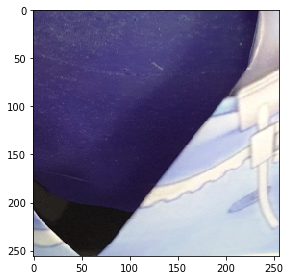

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


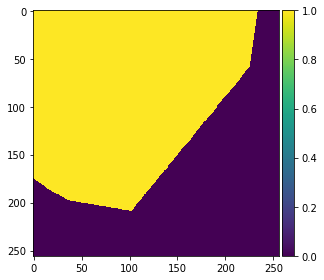

In [4]:
from skimage.io import imread, imshow, imread_collection, concatenate_images
import matplotlib.pyplot as plt

img = X_train[10]
mask = Y_train[10]

imshow(img)
plt.show()

imshow(mask[:,:,0])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
#split train, val, test dataset
seed = 42
# random.seed = seed
# np.random.seed = seed
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [7]:
# Build U-Net model

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import optimizers
import tensorflow as tf



num_filters = 64
IMG_CHANNELS = 3
inputs = Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (s)
# b11 = BatchNormalization(axis=3)(c1)
c1 = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
# b12 = BatchNormalization(axis=3)(c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(num_filters*2, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
# b2 = BatchNormalization(axis=3)(c2)
c2 = Conv2D(num_filters*2, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(num_filters*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
# b3 = BatchNormalization(axis=3)(c3)
c3 = Conv2D(num_filters*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(num_filters*8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
# b4 = BatchNormalization(axis=3)(c4)
c4 = Conv2D(num_filters*8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)
d4 = Dropout(0.5) (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (d4)

c5 = Conv2D(num_filters*16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p4)
# b5 = BatchNormalization(axis=3)(c5)
c5 = Conv2D(num_filters*16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)
d5 = Dropout(0.5) (c5)

u6 = Conv2DTranspose(num_filters*8, (2, 2), strides=(2, 2), padding='same') (d5)
u6 = concatenate([u6, c4])
c6 = Conv2D(num_filters*8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
# c6 = Dropout(0.2) (c6)
c6 = Conv2D(num_filters*8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(num_filters*4, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(num_filters*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
# c7 = Dropout(0.2) (c7)
c7 = Conv2D(num_filters*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(num_filters*2, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(num_filters*2, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u8)
# c8 = Dropout(0.1) (c8)
c8 = Conv2D(num_filters*2, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u9)
# c9 = Dropout(0.1) (c9)
c9 = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)
# c9 = Conv2D(4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
opt = optimizers.Adam(lr=1E-3)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics= [dice_coef])

# model.compile(optimizer=opt, loss= Combo_Loss, metrics= [dice_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
______________________________________________________________________________________________

In [8]:
#training function
early_stop = tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')
results = model.fit(x_train, y_train, batch_size=16, epochs=30,validation_data=(x_val,y_val),verbose = 1, callbacks=[early_stop])
# results = model.fit(x_train, y_train, batch_size=4, epochs=30,validation_data=(x_val,y_val),verbose = 1)

Epoch 1/30
18/18 [==============================] - 108s 3s/step - loss: 0.9525 - dice_coef: 0.5994 - val_loss: 0.4219 - val_dice_coef: 0.7150
Epoch 2/30
18/18 [==============================] - 25s 1s/step - loss: 0.2969 - dice_coef: 0.7992 - val_loss: 0.1554 - val_dice_coef: 0.9421
Epoch 3/30
18/18 [==============================] - 25s 1s/step - loss: 0.1351 - dice_coef: 0.9459 - val_loss: 0.1045 - val_dice_coef: 0.9526
Epoch 4/30
18/18 [==============================] - 25s 1s/step - loss: 0.1314 - dice_coef: 0.9473 - val_loss: 0.1628 - val_dice_coef: 0.9417
Epoch 5/30
18/18 [==============================] - 25s 1s/step - loss: 0.1198 - dice_coef: 0.9508 - val_loss: 0.0836 - val_dice_coef: 0.9636
Epoch 6/30
18/18 [==============================] - 25s 1s/step - loss: 0.0624 - dice_coef: 0.9731 - val_loss: 0.0476 - val_dice_coef: 0.9788
Epoch 7/30
18/18 [==============================] - 25s 1s/step - loss: 0.0482 - dice_coef: 0.9794 - val_loss: 0.0387 - val_dice_coef: 0.9831
Epoch

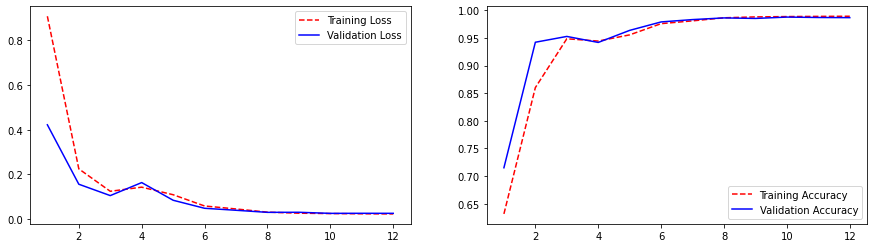

In [9]:
#plot the training progress
fig, axs = plt.subplots(1, 2, figsize = (15, 4))

training_loss = results.history['loss']
validation_loss = results.history['val_loss']

training_accuracy = results.history['dice_coef']
validation_accuracy = results.history['val_dice_coef']

epoch_count = range(1, len(training_loss) + 1)

axs[0].plot(epoch_count, training_loss, 'r--')
axs[0].plot(epoch_count, validation_loss, 'b-')
axs[0].legend(['Training Loss', 'Validation Loss'])

axs[1].plot(epoch_count, training_accuracy, 'r--')
axs[1].plot(epoch_count, validation_accuracy, 'b-')
axs[1].legend(['Training Accuracy', 'Validation Accuracy'])

In [10]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)





# Evaluate on test data
3/3 [==============================] - 1s 370ms/step - loss: 0.0263 - dice_coef: 0.9863
test loss, test acc: [0.026268627494573593, 0.9863117337226868]


1/1 [==============================] - 0s 138ms/step


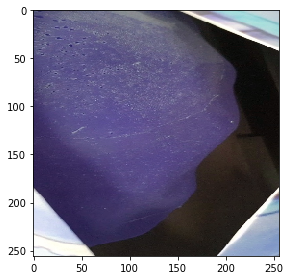

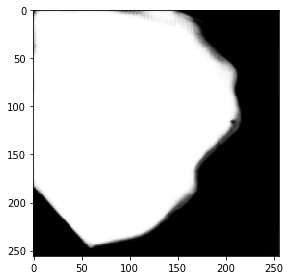

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


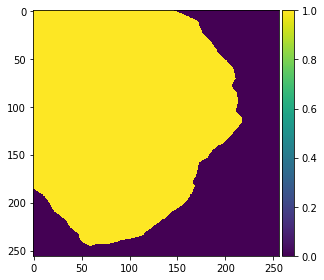

In [34]:
ix = 18
img = x_test[ix]
img = np.expand_dims(img,axis=-1)
img = np.swapaxes(img,2,3)
img = np.swapaxes(img,1,2)
img = np.swapaxes(img,0,1)

mask = y_test[ix]
mask = np.expand_dims(mask,axis=-1)
mask = np.swapaxes(mask,2,3)
mask = np.swapaxes(mask,1,2)
mask = np.swapaxes(mask,0,1)

preds_train = model.predict(img, verbose=1)

imshow(img[0,:,:,:])
plt.show()

imshow(np.squeeze(preds_train[0,:,:,0]))
plt.show()


imshow(np.squeeze(mask[0,:,:,0]))
plt.show()


